 In this project, we will be working with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Institute of Technical and Further Education (TAFE) in Queensland, Australia to find out the reasons why short-term employees quit their jobs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

DETE's survey had 822 participants and 56 columns.

In [4]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [5]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

DETE's survey has many empty columns and is not as valuable in this analysis as the columns:Aboriginal, Torres Strait, South Sea, Disability, NESB.

In [6]:
# TAFE Survey
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

TAFE survey had 702 participants with 72 columns.

In [7]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [8]:
print(tafe_survey.isnull().sum()[:20])
print(tafe_survey.isnull().sum()[50:])

Record ID                                                                                       0
Institute                                                                                       0
WorkArea                                                                                        0
CESSATION YEAR                                                                                  7
Reason for ceasing employment                                                                   1
Contributing Factors. Career Move - Public Sector                                             265
Contributing Factors. Career Move - Private Sector                                            265
Contributing Factors. Career Move - Self-employment                                           265
Contributing Factors. Ill Health                                                              265
Contributing Factors. Maternity/Family                                                        265
Contributing Factors

The survey has quite a few columns with many blank values so we need to remove some unnecessary columns.

DETE Survey

The dete_survey dataframe contains 'Not Stated' values that indicate missing values but they are not represented as NaN so we will pass these as NaN.

In [9]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')

In [10]:
# Remove unnecessary columns

dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49],axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

Through overall assessment, the removed columns are columns that are not necessary for the analysis or have many NaN values.

Rename Columns

 Each data frame contains many identical columns but different column names. Since we eventually want to combine them, we'll have to standardize the column names by renaming them.

In [11]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ','_')
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [12]:
tafe_survey_updated = tafe_survey_updated.rename(columns={'Record ID':'id', 'CESSATION YEAR':'cease_date',
       'Reason for ceasing employment':'separationtype',
       'Gender. What is your Gender?':'gender', 'CurrentAge. Current Age':'age',
       'Employment Type. Employment Type':'employment_status', 'Classification. Classification':'position',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service'})

In [13]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [14]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [15]:
print(dete_survey_updated['separationtype'].value_counts())
print('\n')
print(tafe_survey_updated['separationtype'].value_counts())

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64


For this project, we'll only analyze survey respondents who resigned, so their separation type contains the string 'Resignation'.

In [16]:
dete_resignations = dete_survey_updated.copy()[(dete_survey_updated.copy()['separationtype'] == 'Resignation-Other reasons') | (dete_survey_updated.copy()['separationtype'] == 'Resignation-Other employer') | (dete_survey_updated.copy()['separationtype'] == 'Resignation-Move overseas/interstate')]
tafe_resignations = tafe_survey_updated.copy()[tafe_survey_updated.copy()['separationtype'] == 'Resignation']

Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.
If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [17]:
dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})')[0].value_counts(dropna=False).sort_index(ascending=False)

2014     22
2013    146
2012    129
2010      2
2006      1
NaN      11
Name: 0, dtype: int64

In [18]:
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(r'([1-2][0-9]{3})').astype(float)

In [19]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index()

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

In [20]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

2013.0     55
2012.0     94
2011.0    116
2010.0     68
2009.0      2
NaN         5
Name: cease_date, dtype: int64

It can be seen that information about the year of starting work and leaving the job is quite good for analysis.

tafe_resignations dataframe already has the length of time an employee spent in workplace in "institute_service" column. In order to analyze both surveys together, we'll have to create a corresponding institute_service column in "dete_resignations".

In [21]:
dete_resignations['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
       ... 
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

We will check and create an additional dissatisfied column to represent employees who leave due to dissatisfaction.

In [22]:
# Check the values in the column

print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print('\n')
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64


-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [23]:
dete_resignations_columns = ['job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions', 'work_life_balance', 'workload']
tafe_resignations_columns = ['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']

dete_resignations_values = {}
tafe_resignations_values = {}

for i in dete_resignations_columns:
    val = dete_resignations[i].value_counts(dropna=False)
    dete_resignations_values[i] = val
    
for i in tafe_resignations_columns:
    tafe_resignations_values[i] = tafe_resignations[i].value_counts(dropna=False)

dete_resignations_values = pd.DataFrame(dete_resignations_values)
tafe_resignations_values = pd.DataFrame(tafe_resignations_values)
print(tafe_resignations_values,'\n',dete_resignations_values)

                                        Contributing Factors. Dissatisfaction  \
-                                                                       277.0   
Contributing Factors. Dissatisfaction                                    55.0   
NaN                                                                       8.0   
Job Dissatisfaction                                                       NaN   

                                        Contributing Factors. Job Dissatisfaction  
-                                                                           270.0  
Contributing Factors. Dissatisfaction                                         NaN  
NaN                                                                           8.0  
Job Dissatisfaction                                                          62.0   
        job_dissatisfaction  dissatisfaction_with_the_department  \
False                  270                                  282   
True                    41            

In [24]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif str(val) == '-':
        return False
    else:
        return True

In [25]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']] = tafe_resignations.copy()[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
print(tafe_resignations_up['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64


In [26]:
dete_resignations_up['dissatisfied'] = dete_resignations_up[dete_resignations_columns].any(axis = 1, skipna = False)
tafe_resignations_up['dissatisfied'] =tafe_resignations_up[tafe_resignations_columns].any(axis = 1, skipna = False)

# renames updated datasets
dete_resignations_up = dete_resignations_up.copy() # Copy method used to prevent copy error
tafe_resignations_up = tafe_resignations_up.copy() # Copy method used to prevent copy error

print('dete', '\n', dete_resignations_up.head(), '\n', 'tafe', '\n', tafe_resignations_up.head())

dete 
     id                        separationtype  cease_date  dete_start_date  \
3    4             Resignation-Other reasons      2012.0           2005.0   
5    6             Resignation-Other reasons      2012.0           1994.0   
8    9             Resignation-Other reasons      2012.0           2009.0   
9   10            Resignation-Other employer      2012.0           1997.0   
11  12  Resignation-Move overseas/interstate      2012.0           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...  none_of_t

In [27]:
tafe_resignations_up['dissatisfied']

3      False
4      False
5      False
6      False
7      False
       ...  
696    False
697    False
698    False
699    False
701    False
Name: dissatisfied, Length: 340, dtype: object

Now, we're ready to combine our datasets! Our goal is to aggregate the data according to the "institute_service" column.

I will create an "institute" column in each dataframe to identify the employees of which company after combining them into one dataframe. Then I will remove some unnecessary columns for the analysis process.

In [28]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [29]:
dete_resignations_up['dissatisfied']

3      False
5       True
8      False
9       True
11     False
       ...  
808    False
815    False
816    False
819     True
821    False
Name: dissatisfied, Length: 311, dtype: bool

In [30]:
combined = pd.concat([dete_resignations_up,tafe_resignations_up],ignore_index=True)
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
combined_updated = combined.dropna(thresh=500,axis=1)
combined_updated

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.000000e+00,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.000000e+00,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,1.000000e+01,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,1.200000e+01,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE
...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,Operational (OO),Temporary Full-time,Male,21 25,5-6,False,TAFE
647,6.350668e+17,Resignation,2013.0,Teacher (including LVT),Temporary Full-time,Male,51-55,1-2,False,TAFE
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,False,TAFE
649,6.350704e+17,Resignation,2013.0,Teacher (including LVT),Permanent Full-time,Female,51-55,5-6,False,TAFE


In [32]:
combined_updated['institute_service'].unique()

array([7.0, 18.0, 3.0, 15.0, 14.0, 5.0, nan, 30.0, 32.0, 39.0, 17.0, 9.0,
       6.0, 1.0, 35.0, 38.0, 36.0, 19.0, 4.0, 26.0, 10.0, 8.0, 2.0, 0.0,
       23.0, 13.0, 16.0, 12.0, 21.0, 20.0, 24.0, 33.0, 22.0, 28.0, 49.0,
       11.0, 41.0, 27.0, 42.0, 25.0, 29.0, 34.0, 31.0, '3-4', '7-10',
       '1-2', 'Less than 1 year', '11-20', '5-6', 'More than 20 years'],
      dtype=object)

The "institute_service" column is tricky to clean because it currently contains values in a couple different forms. To analyze the data, we'll convert these numbers into categories,which makes the argument that understanding employee's needs according to career stage instead of age is more effective.We'll use the slightly modified definitions below:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [33]:
combined_updated = combined_updated.copy()
combined_updated['institute_service'] = combined_updated.loc[:,'institute_service'].astype('str')
combined_updated['institute_service'] = combined_updated['institute_service'].str.extract(r'(?P<Min_Year>[0-9][0-9]?)')['Min_Year']
combined_updated['institute_service'] = combined_updated['institute_service'].astype('float')
combined_updated['institute_service'].unique()

array([ 7., 18.,  3., 15., 14.,  5., nan, 30., 32., 39., 17.,  9.,  6.,
        1., 35., 38., 36., 19.,  4., 26., 10.,  8.,  2.,  0., 23., 13.,
       16., 12., 21., 20., 24., 33., 22., 28., 49., 11., 41., 27., 42.,
       25., 29., 34., 31.])

In [34]:
def stages(val):
    if pd.isnull(val):
        return np.nan
    elif val < 3:
        return 'New'
    elif val < 6:
        return 'Experienced'
    elif val < 11:
        return 'Established'
    else:
        return 'Veteran'   

In [35]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(stages)
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    155
Veteran        136
NaN             88
Established     79
Name: service_cat, dtype: int64

Our data is officially ready to begin analysis. To start, we will reassign null values in our dissatisfied column to the most common value, and we will then use the method pivot_table() to calculate the percentage of employees who left their position due to dissatisfaction and create a bar plot of the results.

In [36]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

We can see that we have more False values than True, so we will reassign the NaN values as false.

In [37]:
combined_updated['dissatisfied'] = combined_updated['dissatisfied'].fillna(False)
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

Analysis By Experience

In [38]:
service_cat = combined_updated.pivot_table(index='service_cat',values='dissatisfied')
service_cat

,dissatisfied
service_cat,
Established,0.531646
Experienced,0.316129
New,0.295337
Veteran,0.485294


Text(0, 0.5, 'Frequency')

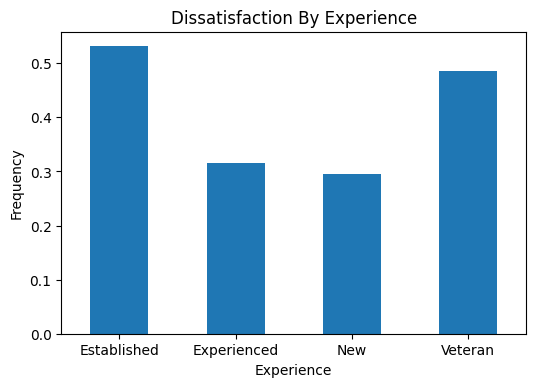

In [48]:
%matplotlib inline
service_cat.plot(kind='bar',legend=False,rot=0)
plt.title('Dissatisfaction By Experience')
plt.xlabel('Experience')
plt.ylabel('Frequency')

It can be seen that employees in the established and veteran stages are more likely to quit due to dissatisfaction.

Analysis By Institute

Text(0.5, 0, 'Institute')

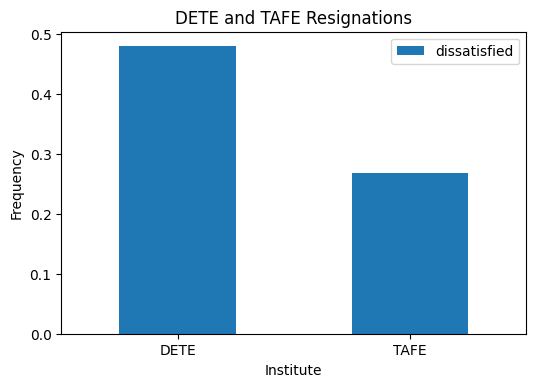

In [53]:
Institute = combined_updated.pivot_table(index='institute',values='dissatisfied')
Institute.plot(kind='bar',rot=0,title='DETE and TAFE Resignations')
plt.ylabel('Frequency')
plt.xlabel('Institute')

From the above graph, we can clearly see that many more people resign from DETE due to dissatisfaction than from TAFE.